<a href="https://colab.research.google.com/github/bhogasena/Linear_Regression/blob/main/Simple_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas.util.testing as tm

## Step1 : Visualize the data

In [6]:
advertising = pd.read_csv('advertising.csv')
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


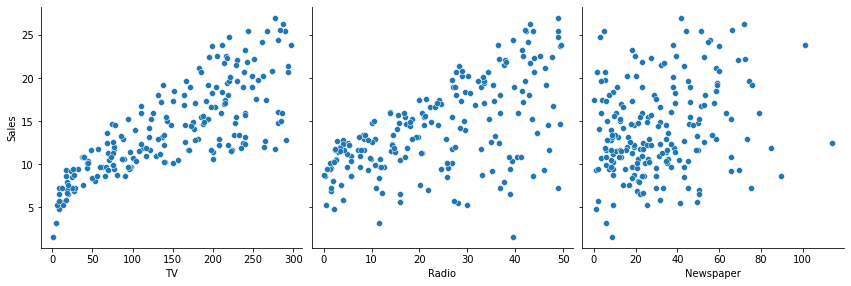

In [14]:
sns.pairplot(advertising,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],kind='scatter',height=4)
plt.show()

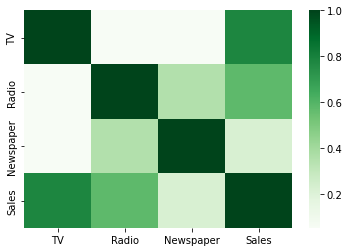

In [19]:
sns.heatmap(advertising.corr(),cmap='Greens')
plt.show()

## Observations

1. It looks like TV has more linear relationship with sales from Scatter plot
2. From correlation heat map also, it shows TV and sales has more correlation

## So further in this we will try to buils a simple linear regression model with the predictor variable TV

# Step 2 : Build a Liner Regression Model

1. Split the dataset to train and test
2. Build the model with train data
3. Evaluate the model with test data

In [26]:
X = advertising['TV']
y = advertising['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)
X_train.shape

(140,)

In [27]:
X_train.head()

116    139.2
67     139.3
78       5.4
42     293.6
17     281.4
Name: TV, dtype: float64

In [28]:
y_train.head()

116    12.2
67     13.4
78      5.3
42     20.7
17     24.4
Name: Sales, dtype: float64

## Build a model using Statsmodels library

In [32]:
X_train_sm = sm.add_constant(X_train,1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [37]:
lr = sm.OLS(y_train,X_train_sm).fit()
lr.params

const    6.923520
TV       0.048122
dtype: float64

In [38]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     228.4
Date:                Mon, 16 May 2022   Prob (F-statistic):           4.71e-31
Time:                        23:15:10   Log-Likelihood:                -363.19
No. Observations:                 140   AIC:                             730.4
Df Residuals:                     138   BIC:                             736.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9235      0.532     13.025      0.000       5.872       7.975
TV             0.0481      0.003     15.112      0.000       0.042       0.054
==============================================================================
Omnibus:                        0.320   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.852   Jarque-Bera (JB):                0.427
Skew:                          -0.106   Prob(JB):                        0.808
Kurtosis:                       2.831   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Statistics analysis

The values we are concerned with are -

    1. The coefficients and significance (p-values)
    2. R-squared
    3. F statistic and its significance

1. The coefficient for TV is 0.0481, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.613
Meaning that 61,3% of the variance in Sales is explained by TV

This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

In [43]:
y_train_pred = lr.predict(X_train_sm)

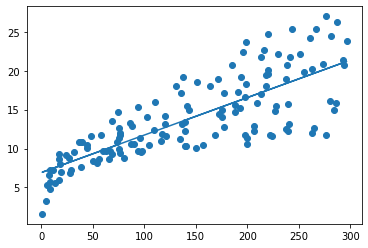

In [44]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_train_pred)
plt.show()

## Residual Analysis
### Distribution of Error terms

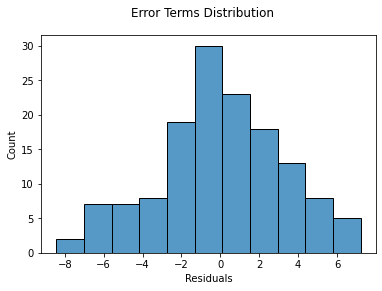

In [45]:
fig = plt.figure()
sns.histplot(data=(y_train-  y_train_pred))
plt.suptitle("Error Terms Distribution")
plt.xlabel("Residuals")
plt.show()

#### Above plot shows that Error terms are normal distributed with mean 0
## Check if error terms are independent by X by plotting scatter

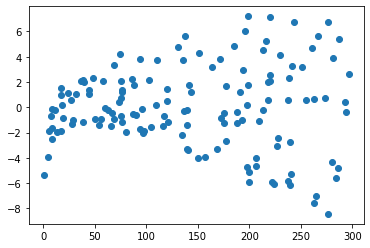

In [47]:
plt.scatter(X_train,(y_train-  y_train_pred))
plt.show()

there is no standrd observation on this plot and so we can assume that there is no dependency on error terms

# Step 3: Predict the test data

In [49]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [50]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.5750618604943311

### This is good as we got R2 score for train data as .623 and test data no much difference as it is .57

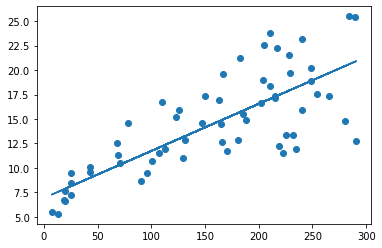

In [51]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred)
plt.show()

# Linear Regression using SKLearn

In [56]:
X_train_lr = X_train.values.reshape(-1,1)
X_test_lr = X_test.values.reshape(-1,1)
lr = LinearRegression()


In [57]:
lr.fit(X_train_lr,y_train)

LinearRegression()

In [58]:
lr.coef_

array([0.04812204])

In [59]:
lr.intercept_

6.923519536059553

In [60]:
y_test_pred = lr.predict(X_test_lr)

In [61]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.575061860494331